# Which Countries Pay The Most and Least for Netflix in 2021?

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# Data Extraction

In [2]:
#read dataset
df = pd.read_csv('../input/netflix-subscription-price-in-different-countries/Netflix subscription fee Dec-2021.csv')

In [3]:
#show head of dataset
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


# Exploratory Data Analysis (EDA)

In [4]:
#check rows and columns of dataset
df.shape

(65, 8)

In [5]:
#check all columns
df.columns

Index(['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)'],
      dtype='object')

In [6]:
#rename attribute columns of dataset
df = df.rename(columns = {'Country_code' : 'Country_Code', 'Total Library Size' : 'Library_Size', 
                         'No. of TV Shows' : 'No_TV_Shows', 'No. of Movies' : 'No_Movies', 
                         'Cost Per Month - Basic ($)' : 'Basic_Cost_Per_Month', 
                         'Cost Per Month - Standard ($)' : 'Standard_Cost_Per_Month', 
                         'Cost Per Month - Premium ($)' : 'Premium_Cost_Per_Month'})
df.head()

,Country_Code,Country,Library_Size,No_TV_Shows,No_Movies,Basic_Cost_Per_Month,Standard_Cost_Per_Month,Premium_Cost_Per_Month
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [7]:
#check type of dataset
df.dtypes

Country_Code                object
Country                     object
Library_Size                 int64
No_TV_Shows                  int64
No_Movies                    int64
Basic_Cost_Per_Month       float64
Standard_Cost_Per_Month    float64
Premium_Cost_Per_Month     float64
dtype: object

In [8]:
#check missing value of dataset
df.isnull().sum()

Country_Code               0
Country                    0
Library_Size               0
No_TV_Shows                0
No_Movies                  0
Basic_Cost_Per_Month       0
Standard_Cost_Per_Month    0
Premium_Cost_Per_Month     0
dtype: int64

In [9]:
#describe all columns
df.describe(include = 'object')

,Country_Code,Country
count,65,65
unique,65,65
top,ar,Argentina
freq,1,1


In [10]:
#check correlation of each variable
df.corr()

,Library_Size,No_TV_Shows,No_Movies,Basic_Cost_Per_Month,Standard_Cost_Per_Month,Premium_Cost_Per_Month
Library_Size,1.000000,0.971146,0.849957,-0.062877,-0.055200,-0.071521
No_TV_Shows,0.971146,1.000000,0.699786,-0.003814,0.002285,-0.011100
No_Movies,0.849957,0.699786,1.000000,-0.179913,-0.170391,-0.189711
Basic_Cost_Per_Month,-0.062877,-0.003814,-0.179913,1.000000,0.898535,0.820914
Standard_Cost_Per_Month,-0.055200,0.002285,-0.170391,0.898535,1.000000,0.978768
Premium_Cost_Per_Month,-0.071521,-0.011100,-0.189711,0.820914,0.978768,1.000000


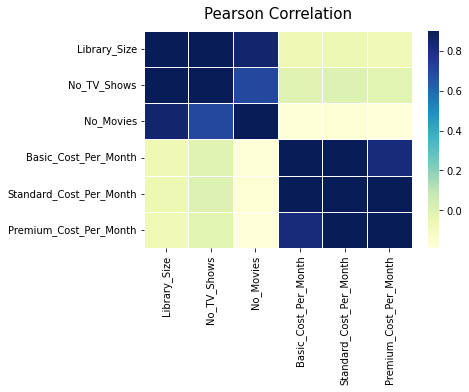

In [11]:
#visualize correlation of each variable using pearson correlation
sns.heatmap(df.corr(), vmax = 0.9, linewidths = 0.9, cmap = 'YlGnBu')
plt.title('Pearson Correlation', fontsize = 15, pad = 12)
plt.show()

In [12]:
#check unique of country code column
df['Country_Code'].unique()

array(['ar', 'au', 'at', 'be', 'bo', 'br', 'bg', 'ca', 'cl', 'co', 'cr',
       'hr', 'cz', 'dk', 'ec', 'ee', 'fi', 'fr', 'de', 'gi', 'gr', 'gt',
       'hn', 'hk', 'hu', 'is', 'in', 'id', 'ie', 'il', 'it', 'jp', 'lv',
       'li', 'lt', 'my', 'mx', 'md', 'mc', 'nl', 'nz', 'no', 'py', 'pe',
       'ph', 'pl', 'pt', 'ro', 'ru', 'sm', 'sg', 'sk', 'za', 'kr', 'es',
       'se', 'ch', 'tw', 'th', 'tr', 'ua', 'gb', 'us', 'uy', 've'],
      dtype=object)

In [13]:
#check number of country code
df['Country_Code'].value_counts()

ar    1
li    1
my    1
mx    1
md    1
     ..
id    1
ie    1
il    1
it    1
ve    1
Name: Country_Code, Length: 65, dtype: int64

In [14]:
#check unique of country column
df['Country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Croatia', 'Czechia', 'Denmark', 'Ecuador', 'Estonia', 'Finland',
       'France', 'Germany', 'Gibraltar', 'Greece', 'Guatemala',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Malaysia', 'Mexico', 'Moldova',
       'Monaco', 'Netherlands', 'New Zealand', 'Norway', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'San Marino', 'Singapore', 'Slovakia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turkey', 'Ukraine', 'United Kingdom', 'United States',
       'Uruguay', 'Venezuela'], dtype=object)

In [15]:
#check number of country
df['Country'].value_counts()

Argentina        1
Liechtenstein    1
Malaysia         1
Mexico           1
Moldova          1
                ..
Indonesia        1
Ireland          1
Israel           1
Italy            1
Venezuela        1
Name: Country, Length: 65, dtype: int64

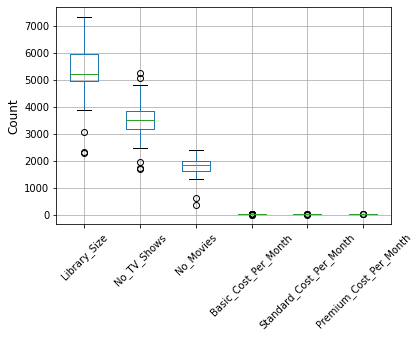

Maximum of library size : 7325
Minimum of library size : 2274
Median of library size : 5195.0
Average of library size : 5314.415384615385
Total of library size : 345437


Maximum of number TV shows : 5234
Minimum of number TV shows : 1675
Median of number TV shows : 3512.0
Average of number TV shows : 3518.9538461538464
Total of number TV shows : 228732


Maximum of number movies : 2387
Minimum of number movies : 373
Median of number movies : 1841.0
Average of number movies : 1795.4615384615386
Total of number movies : 116705


Maximum of basic cost per month : 12.88
Minimum of basic cost per month : 1.97
Median of basic cost per month : 8.99
Average of basic cost per month : 8.368461538461535
Total of basic cost per month : 543.95


Maximum of standard cost per month : 20.46
Minimum of standard cost per month : 3.0
Median of standard cost per month : 11.49
Average of standard cost per month : 11.989999999999998
Total of standard cost per month : 779.35


Maximum of premium cost per mo

In [16]:
#visualize the outlier of each variable
chart = df.boxplot()
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.ylabel('Count', fontsize = 12)
plt.show()

print('Maximum of library size :', df['Library_Size'].max())
print('Minimum of library size :', df['Library_Size'].min())
print('Median of library size :', df['Library_Size'].median())
print('Average of library size :', df['Library_Size'].mean())
print('Total of library size :', df['Library_Size'].sum())
print('\n')
print('Maximum of number TV shows :', df['No_TV_Shows'].max())
print('Minimum of number TV shows :', df['No_TV_Shows'].min())
print('Median of number TV shows :', df['No_TV_Shows'].median())
print('Average of number TV shows :', df['No_TV_Shows'].mean())
print('Total of number TV shows :', df['No_TV_Shows'].sum())
print('\n')
print('Maximum of number movies :', df['No_Movies'].max())
print('Minimum of number movies :', df['No_Movies'].min())
print('Median of number movies :', df['No_Movies'].median())
print('Average of number movies :', df['No_Movies'].mean())
print('Total of number movies :', df['No_Movies'].sum())
print('\n')
print('Maximum of basic cost per month :', df['Basic_Cost_Per_Month'].max())
print('Minimum of basic cost per month :', df['Basic_Cost_Per_Month'].min())
print('Median of basic cost per month :', df['Basic_Cost_Per_Month'].median())
print('Average of basic cost per month :', df['Basic_Cost_Per_Month'].mean())
print('Total of basic cost per month :', df['Basic_Cost_Per_Month'].sum())
print('\n')
print('Maximum of standard cost per month :', df['Standard_Cost_Per_Month'].max())
print('Minimum of standard cost per month :', df['Standard_Cost_Per_Month'].min())
print('Median of standard cost per month :', df['Standard_Cost_Per_Month'].median())
print('Average of standard cost per month :', df['Standard_Cost_Per_Month'].mean())
print('Total of standard cost per month :', df['Standard_Cost_Per_Month'].sum())
print('\n')
print('Maximum of premium cost per month :', df['Premium_Cost_Per_Month'].max())
print('Minimum of premium cost per month :', df['Premium_Cost_Per_Month'].min())
print('Median of premium cost per month :', df['Premium_Cost_Per_Month'].median())
print('Average of premium cost per month :', df['Premium_Cost_Per_Month'].mean())
print('Total of premium cost per month :', df['Premium_Cost_Per_Month'].sum())

In [17]:
#analyze of library size under 5195 based on country and country code
df[df['Library_Size'] < 5195.0][['Country_Code', 'Country', 'Library_Size']]

,Country_Code,Country,Library_Size
0,ar,Argentina,4760
3,be,Belgium,4990
4,bo,Bolivia,4991
5,br,Brazil,4972
8,cl,Chile,4994
9,co,Colombia,4991
10,cr,Costa Rica,4988
11,hr,Croatia,2274
13,dk,Denmark,4558
14,ec,Ecuador,4992


In [18]:
#analyze of library size over 5195 based on country and country code
df[df['Library_Size'] > 5195.0][['Country_Code', 'Country', 'Library_Size']]

,Country_Code,Country,Library_Size
1,au,Australia,6114
2,at,Austria,5640
6,bg,Bulgaria,6797
7,ca,Canada,6239
12,cz,Czechia,7325
15,ee,Estonia,6456
17,fr,France,5445
18,de,Germany,5668
19,gi,Gibraltar,6167
24,hu,Hungary,6884


In [19]:
#analyze of number TV shows under 3512 based on country and country code
df[df['No_TV_Shows'] < 3512.0][['Country_Code', 'Country', 'No_TV_Shows']]

,Country_Code,Country,No_TV_Shows
0,ar,Argentina,3154
3,be,Belgium,3374
4,bo,Bolivia,3155
5,br,Brazil,3162
8,cl,Chile,3156
9,co,Colombia,3156
10,cr,Costa Rica,3152
11,hr,Croatia,1675
13,dk,Denmark,2978
14,ec,Ecuador,3155


In [20]:
#analyze of number TV shows over 3512 based on country and country code
df[df['No_TV_Shows'] > 3512.0][['Country_Code', 'Country', 'No_TV_Shows']]

,Country_Code,Country,No_TV_Shows
1,au,Australia,4050
2,at,Austria,3779
6,bg,Bulgaria,4819
7,ca,Canada,4311
12,cz,Czechia,5234
15,ee,Estonia,4486
17,fr,France,3604
18,de,Germany,3814
19,gi,Gibraltar,4079
24,hu,Hungary,4802


In [21]:
#analyze of number movies under 1841 based on country and country code
df[df['No_Movies'] < 1841.0][['Country_Code', 'Country', 'No_Movies']]

,Country_Code,Country,No_Movies
0,ar,Argentina,1606
3,be,Belgium,1616
4,bo,Bolivia,1836
5,br,Brazil,1810
8,cl,Chile,1838
9,co,Colombia,1835
10,cr,Costa Rica,1836
11,hr,Croatia,599
13,dk,Denmark,1580
14,ec,Ecuador,1837


In [22]:
#analyze of number movies over 1841 based on country and country code
df[df['No_Movies'] > 1841.0][['Country_Code', 'Country', 'No_Movies']]

,Country_Code,Country,No_Movies
1,au,Australia,2064
2,at,Austria,1861
6,bg,Bulgaria,1978
7,ca,Canada,1928
12,cz,Czechia,2091
15,ee,Estonia,1970
18,de,Germany,1854
19,gi,Gibraltar,2088
23,hk,Hong Kong,1863
24,hu,Hungary,2082


In [23]:
#analyze of basic cost per month under 8.99 based on country and country code
df[df['Basic_Cost_Per_Month'] < 8.99][['Country_Code', 'Country', 'Basic_Cost_Per_Month']]

,Country_Code,Country,Basic_Cost_Per_Month
0,ar,Argentina,3.74
1,au,Australia,7.84
4,bo,Bolivia,7.99
5,br,Brazil,4.61
7,ca,Canada,7.91
8,cl,Chile,7.07
9,co,Colombia,4.31
12,cz,Czechia,8.83
14,ec,Ecuador,7.99
21,gt,Guatemala,7.99


In [24]:
#analyze of basic cost per month over 8.99 based on country and country code
df[df['Basic_Cost_Per_Month'] > 8.99][['Country_Code', 'Country', 'Basic_Cost_Per_Month']]

,Country_Code,Country,Basic_Cost_Per_Month
2,at,Austria,9.03
3,be,Belgium,10.16
6,bg,Bulgaria,9.03
11,hr,Croatia,9.03
13,dk,Denmark,12.00
15,ee,Estonia,9.03
16,fi,Finland,9.03
17,fr,France,10.16
18,de,Germany,9.03
19,gi,Gibraltar,9.03


In [25]:
#analyze of standard cost per month under 11.49 based on country and country code
df[df['Standard_Cost_Per_Month'] < 11.49][['Country_Code', 'Country', 'Standard_Cost_Per_Month']]

,Country_Code,Country,Standard_Cost_Per_Month
0,ar,Argentina,6.30
4,bo,Bolivia,10.99
5,br,Brazil,7.11
6,bg,Bulgaria,11.29
8,cl,Chile,9.91
9,co,Colombia,6.86
11,hr,Croatia,11.29
14,ec,Ecuador,10.99
15,ee,Estonia,11.29
21,gt,Guatemala,10.99


In [26]:
#analyze of standard cost per month over 11.49 based on country and country code
df[df['Standard_Cost_Per_Month'] > 11.49][['Country_Code', 'Country', 'Standard_Cost_Per_Month']]

,Country_Code,Country,Standard_Cost_Per_Month
1,au,Australia,12.12
2,at,Austria,14.67
3,be,Belgium,15.24
7,ca,Canada,11.87
10,cr,Costa Rica,12.99
13,dk,Denmark,15.04
16,fi,Finland,13.54
17,fr,France,15.24
18,de,Germany,14.67
19,gi,Gibraltar,14.67


In [27]:
#analyze of premium cost per month under 14.45 based on country and country code
df[df['Premium_Cost_Per_Month'] < 14.45][['Country_Code', 'Country', 'Premium_Cost_Per_Month']]

,Country_Code,Country,Premium_Cost_Per_Month
0,ar,Argentina,9.26
4,bo,Bolivia,13.99
5,br,Brazil,9.96
6,bg,Bulgaria,13.54
8,cl,Chile,12.74
9,co,Colombia,9.93
11,hr,Croatia,13.54
12,cz,Czechia,14.15
14,ec,Ecuador,13.99
15,ee,Estonia,13.54


In [28]:
#analyze of premium cost per month over 14.45 based on country and country code
df[df['Premium_Cost_Per_Month'] > 14.45][['Country_Code', 'Country', 'Premium_Cost_Per_Month']]

,Country_Code,Country,Premium_Cost_Per_Month
1,au,Australia,16.39
2,at,Austria,20.32
3,be,Belgium,20.32
7,ca,Canada,15.03
10,cr,Costa Rica,15.99
13,dk,Denmark,19.60
16,fi,Finland,18.06
17,fr,France,20.32
18,de,Germany,20.32
19,gi,Gibraltar,20.32


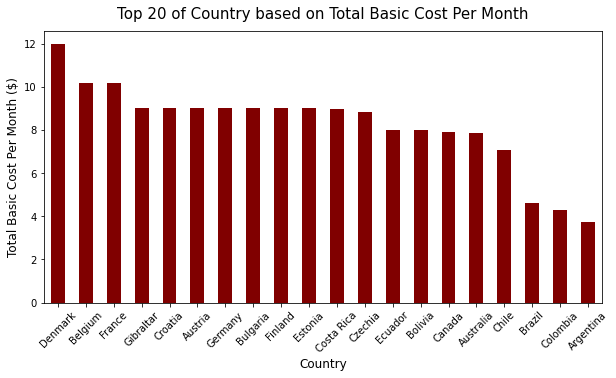

In [29]:
#visualize top 20 of country based on total basic cost per month
plt.figure(figsize = (10,5))
top_20_country = df['Country'][:20]
chart = df.groupby(top_20_country)['Basic_Cost_Per_Month'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                  color = 'maroon')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 20 of Country based on Total Basic Cost Per Month', fontsize = 15, pad = 12)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Total Basic Cost Per Month ($)', fontsize = 12)
plt.show()

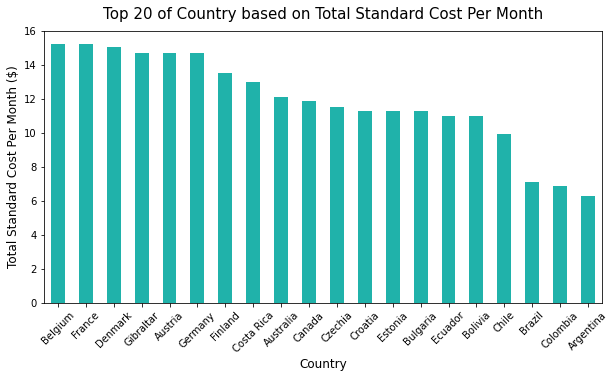

In [30]:
#visualize top 20 of country based on total standard cost per month
plt.figure(figsize = (10,5))
chart = df.groupby(top_20_country)['Standard_Cost_Per_Month'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                  color = 'lightseagreen')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 20 of Country based on Total Standard Cost Per Month', fontsize = 15, pad = 12)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Total Standard Cost Per Month ($)', fontsize = 12)
plt.show()

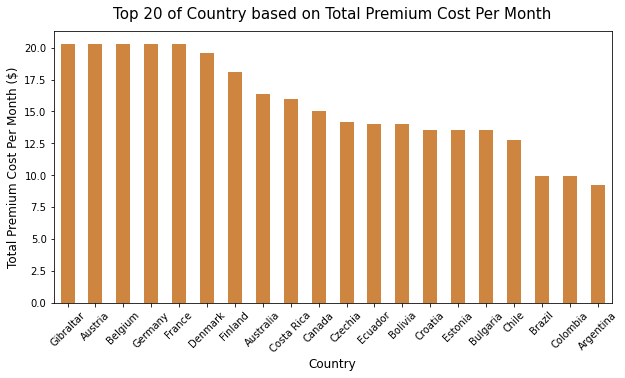

In [31]:
#visualize top 20 of country based on total premium cost per month
plt.figure(figsize = (10,5))
chart = df.groupby(top_20_country)['Premium_Cost_Per_Month'].sum().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                  color = 'peru')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 20 of Country based on Total Premium Cost Per Month', fontsize = 15, pad = 12)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Total Premium Cost Per Month ($)', fontsize = 12)
plt.show()

In [32]:
#profile report of dataset
ProfileReport(df)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]